# Data formatting for bounding box labels
We consider the data exported from PlainSight in COCO format, reformat this into YOLOv5 format and plot the resulting bounding boxes as a sanity check. We also combine the seperate exports from Pete and Thomas.

In [1]:
import os
import sys

# Root directory
root_dir = '/Users/Holmes/Research/Projects/vespai'
os.chdir(root_dir)  # Move to root_dir
sys.path.insert(0, root_dir)

# Data directory
box_expansion_factor = 0.0
data_dir = os.path.join(root_dir, 'datasets/boxes-21')
os.listdir(data_dir)

# Automatically reload imported programmes
%load_ext autoreload
%autoreload 2

## Create YOLOv5 annotation files from JSON files

This first function reads the json_file in the list and extracts the annotations attached to each image file. The output is a list of dictionaries, one for each image.

Next it creates a temporary directory ann in which to store the YOLOv5 formatted annotations. We optionally expand the box sides by a proportion of the tight-fitting length; this helps include the legs.

In [2]:
from formatting.boxes import yolov5_boxes_from_json

json_files = []
for dataset in ['train', 'validation', 'test']:
    for ii in range(5):
        json_files.append(dataset + '-set-{:02d}.json'.format(ii + 1))
dict_list = yolov5_boxes_from_json(data_dir, json_files)

['train-set-01.json', 'train-set-02.json', 'train-set-03.json', 'train-set-04.json', 'train-set-05.json', 'validation-set-01.json', 'validation-set-02.json', 'validation-set-03.json', 'validation-set-04.json', 'validation-set-05.json', 'test-set-01.json', 'test-set-02.json', 'test-set-03.json', 'test-set-04.json', 'test-set-05.json']
/Users/Holmes/Research/Projects/vespai/datasets/boxes-21/train-set-01.json
/Users/Holmes/Research/Projects/vespai/datasets/boxes-21/train-set-02.json
/Users/Holmes/Research/Projects/vespai/datasets/boxes-21/train-set-03.json
/Users/Holmes/Research/Projects/vespai/datasets/boxes-21/train-set-04.json
/Users/Holmes/Research/Projects/vespai/datasets/boxes-21/train-set-05.json
/Users/Holmes/Research/Projects/vespai/datasets/boxes-21/validation-set-01.json
/Users/Holmes/Research/Projects/vespai/datasets/boxes-21/validation-set-02.json
/Users/Holmes/Research/Projects/vespai/datasets/boxes-21/validation-set-03.json
/Users/Holmes/Research/Projects/vespai/datasets/b

In [3]:
dict_list[0]

{'bboxes': [{'class': 0,
   'ymin': 607.0719132062886,
   'ymax': 737.2580254992736,
   'xmin': 1020.5514326039522,
   'xmax': 1161.9200246984071}],
 'filename': 'img/01FVYTPK1Y41DPXA3XWSYD2VP5.jpeg',
 'image_id': 'train-set-01-01FVYTPK1Y41DPXA3XWSYD2VP5.jpeg',
 'image_size': (1080, 1920)}

## Split into data subsets
Next we split the image and annotation files into an 80:10:10 split: `train`, `val` and `test` as subdirectories of the new folders `images` and `labels`.

In [4]:
from formatting.boxes import split_train_val_test

split_train_val_test(data_dir)

Optionally, store locations of the `train`, `val` and `test` files in a locally pointing YAML for the model to read. 

In [5]:
from formatting.boxes import write_yaml

yaml_name = 'config-local.yaml'
write_yaml(data_dir, yaml_name)

## Plot example annotated images
Vespa crabro is boxed in *yellow*;
Vespa velutina in *red*.

File name: /Users/Holmes/Research/Projects/vespai/datasets/boxes-21/labels/train/01G2Z2MVA1S5WSV53C6FBTK97K.txt
Annotations:
['1', '0.361', '0.297', '0.080', '0.103']
5
Vespa crabro (yellow) count:  0
Vespa velutina (red) count:  1


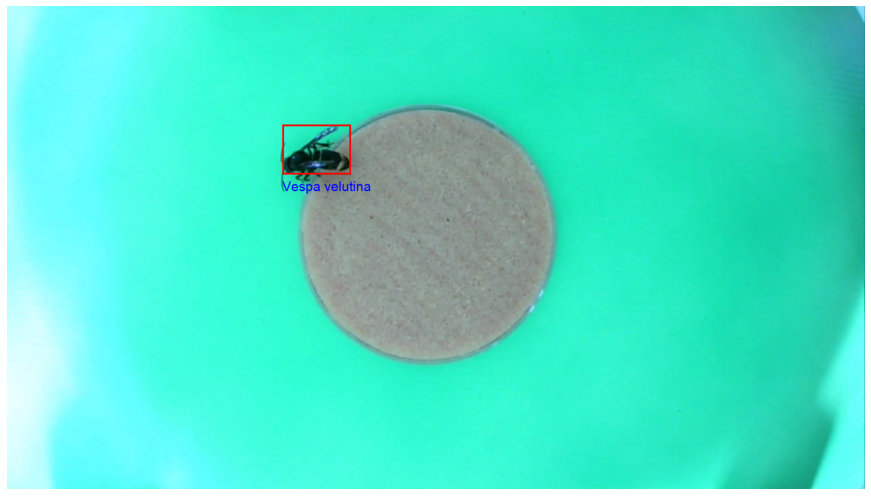

File name: /Users/Holmes/Research/Projects/vespai/datasets/boxes-21/labels/train/01FTXK6V9J3BNH5YJC0S9BZSJP.txt
Annotations:
['1', '0.383', '0.378', '0.069', '0.141']
5
Vespa crabro (yellow) count:  0
Vespa velutina (red) count:  1


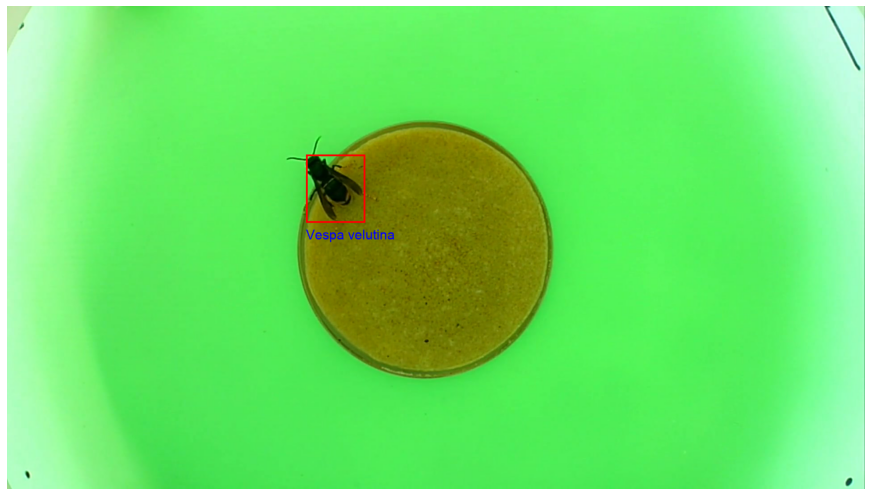

File name: /Users/Holmes/Research/Projects/vespai/datasets/boxes-21/labels/train/01FVAGPV8SRYGKGSMT0TER3XTZ.txt
Annotations:
['1', '0.508', '0.449', '0.085', '0.119']
5
Vespa crabro (yellow) count:  0
Vespa velutina (red) count:  1


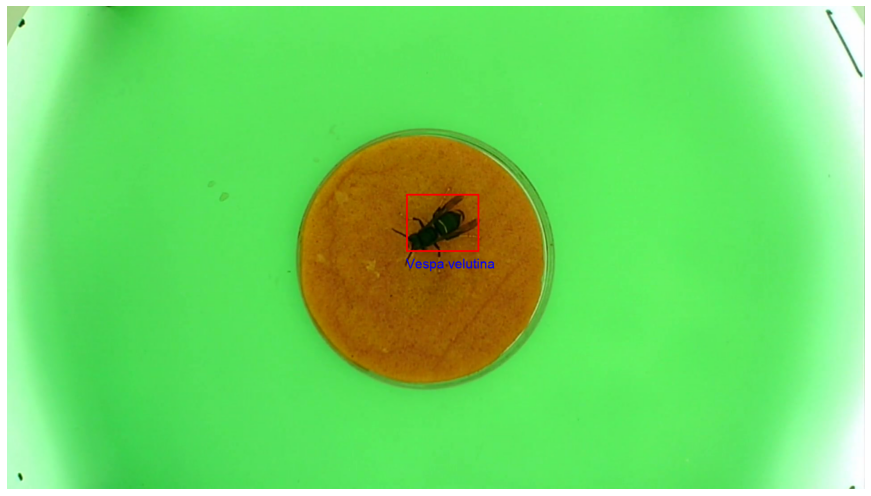

File name: /Users/Holmes/Research/Projects/vespai/datasets/boxes-21/labels/train/01FV86TKY3F60A22TM4NYVG3XR.txt
Annotations:
['1', '0.587', '0.366', '0.050', '0.143']
5
Vespa crabro (yellow) count:  0
Vespa velutina (red) count:  1


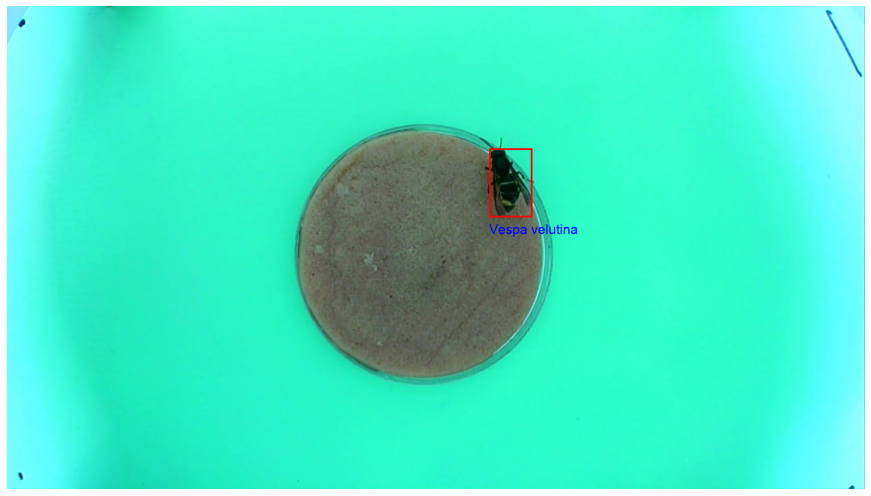

File name: /Users/Holmes/Research/Projects/vespai/datasets/boxes-21/labels/train/01FVFE2QBE5PKE7FAY99WN1AVR.txt
Annotations:
['1', '0.172', '0.297', '0.037', '0.123']
5
Vespa crabro (yellow) count:  0
Vespa velutina (red) count:  1


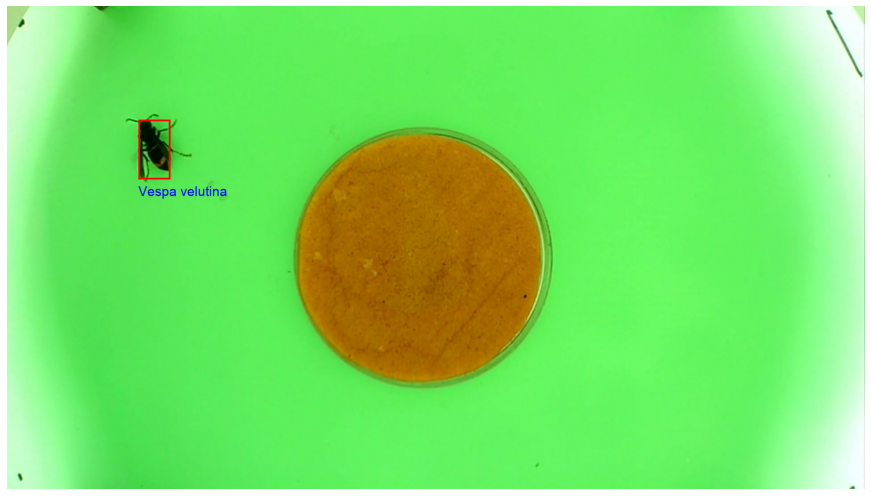

File name: /Users/Holmes/Research/Projects/vespai/datasets/boxes-21/labels/train/01FV7WT88DZ4QHAP10MV4AZ4S6.txt
Annotations:
['1', '0.516', '0.694', '0.049', '0.159']
5
Vespa crabro (yellow) count:  0
Vespa velutina (red) count:  1


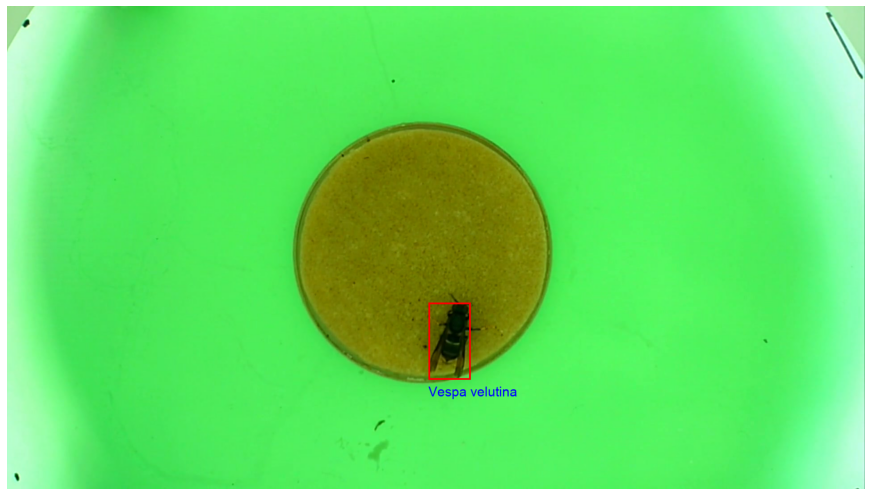

File name: /Users/Holmes/Research/Projects/vespai/datasets/boxes-21/labels/train/01FVJ6DCY07QWKFTEHFAZMVPDN.txt
Annotations:
['0', '0.542', '0.524', '0.070', '0.142']
5
Vespa crabro (yellow) count:  1
Vespa velutina (red) count:  0


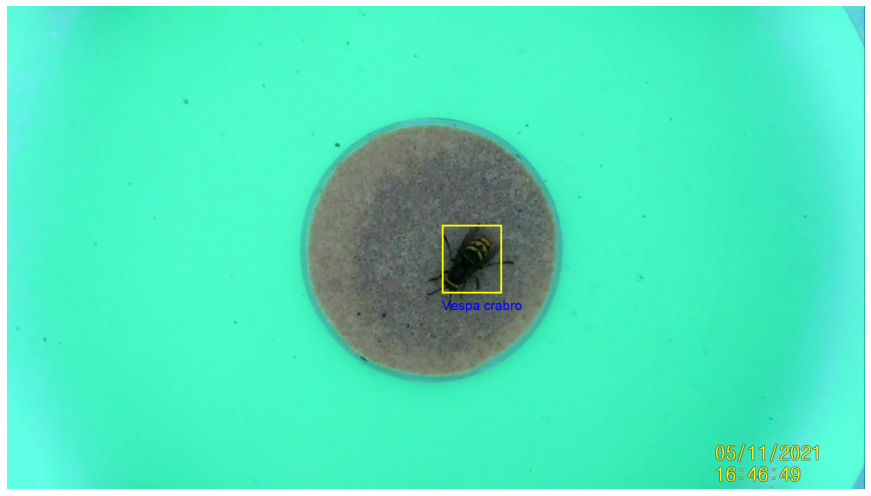

File name: /Users/Holmes/Research/Projects/vespai/datasets/boxes-21/labels/train/01FVAGPREJZW60P26VCJEWX3ZZ.txt
Annotations:
['1', '0.506', '0.450', '0.088', '0.122']
5
Vespa crabro (yellow) count:  0
Vespa velutina (red) count:  1


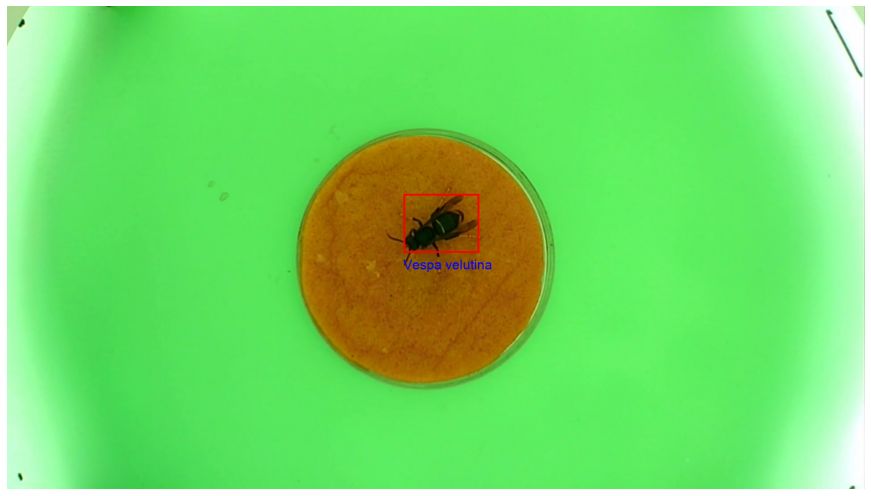

File name: /Users/Holmes/Research/Projects/vespai/datasets/boxes-21/labels/train/01FTZZPY8D4EPQMK5E1NEP583K.txt
Annotations:
['1', '0.426', '0.336', '0.060', '0.152']
5
Vespa crabro (yellow) count:  0
Vespa velutina (red) count:  1


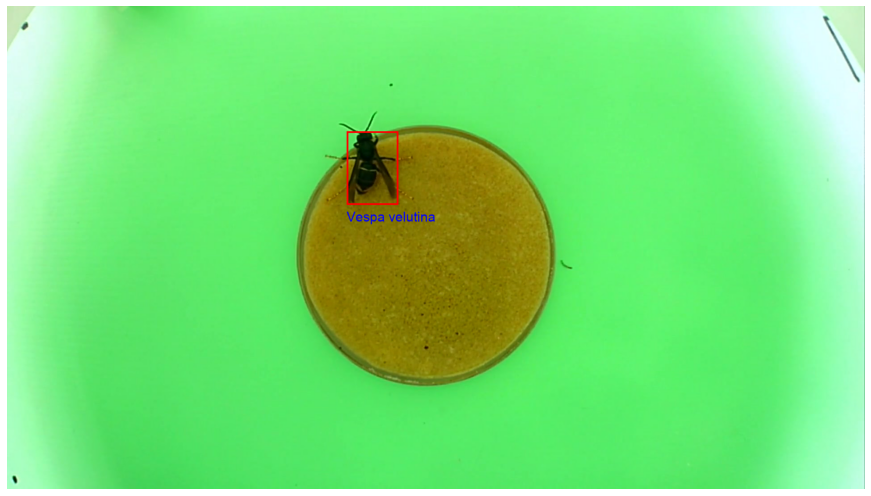

File name: /Users/Holmes/Research/Projects/vespai/datasets/boxes-21/labels/train/01FWE0V0ARQAZGS13YFBEYNM90.txt
Annotations:
['1', '0.393', '0.370', '0.059', '0.147']
5
Vespa crabro (yellow) count:  0
Vespa velutina (red) count:  1


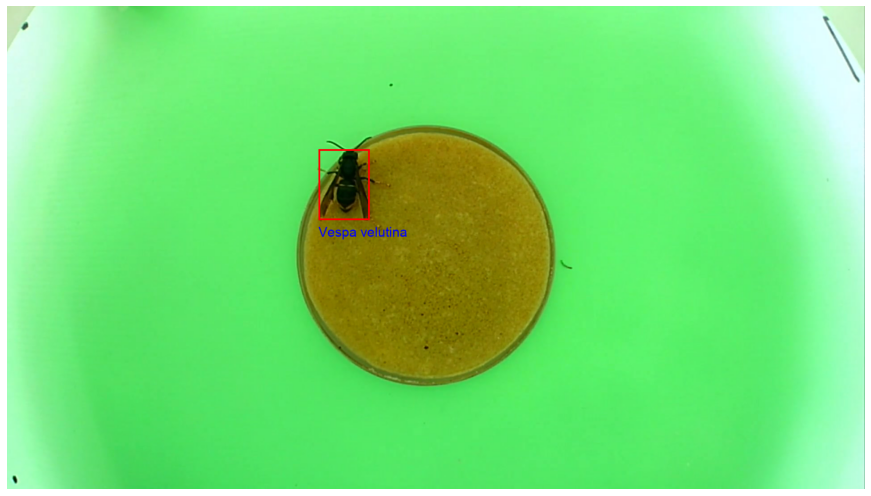

In [6]:
import glob
import random
from formatting.boxes import check_bboxes
%matplotlib inline

annotation_files = glob.glob(os.path.join(data_dir, 'labels/train/*.txt'))

# Randomly choose annotation files to overlay onto images
random.seed(0)
selection = random.choices(annotation_files, k=10)


# `plot_bounding_boxes` uses PIL.ImageDraw: if problem, set `print_labels=False`.
os.makedirs(os.path.join(data_dir, 'examples'), exist_ok=True)
for file in selection:
    print('File name:', file)
    fig, file_name = check_bboxes(file, print_labels=True)
    fig.savefig(os.path.join(
            data_dir, 'examples', 'labelled-' + os.path.basename(file_name)
        ))
